In [ ]:
# # **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI & SKTIME ****************
stable = False # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null
!pip install sktime -U  >> /dev/null

  Running command git clone -q https://github.com/timeseriesAI/tsai.git /tmp/pip-req-build-0avqgmn1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.11.4 requires numpy<1.22,>=1.21.0, but you have numpy 1.19.5 which is incompatible.
pycaret 2.3.10 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.9.0 which is incompatible.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.
pycaret 2.3.10 requires imbalan

In [43]:
from tsai.basics import *
import sktime
import sklearn
my_setup(sktime, sklearn)

os             : Linux-5.11.0-27-generic-x86_64-with-glibc2.17
python         : 3.8.12
tsai           : 0.3.1
fastai         : 2.6.3
fastcore       : 1.4.3
sktime         : 0.10.1
sklearn        : 1.0.2
torch          : 1.11.0
device         : 1 gpu (['NVIDIA GeForce RTX 3070 Laptop GPU'])
cpu cores      : 16
RAM            : 15.08 GB
GPU memory     : [8.0] GB


In [2]:
from tsai.models.MINIROCKET import *

In [ ]:
path_to_data = "./"

In [4]:
df = pd.read_csv('fixed_data_with_snow.csv')

In [5]:
df

,Unnamed: 0,Timestamp,Value-1002-zeya-malayasazanka,Value-1003-zeya-svobodny,Value-2366-zeya-blagoveshensk,Value-316-zeya-mazanovo,Value-317-zeya-belogorye,snow_high,snow_level,snow_Q1
0,0,2008-01-01,435,163,148,218,341,4.0,10.0,0.0
1,1,2008-01-02,441,162,151,222,350,4.0,10.0,0.0
2,2,2008-01-03,447,161,157,226,361,4.0,10.0,0.0
3,3,2008-01-04,447,154,163,230,367,4.0,10.0,0.0
4,4,2008-01-05,443,144,168,222,364,4.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4744,4744,2020-12-27,434,167,134,235,343,5.0,10.0,0.0
4745,4745,2020-12-28,435,169,134,235,343,5.0,10.0,0.0
4746,4746,2020-12-29,438,171,132,232,342,5.0,10.0,0.0
4747,4747,2020-12-30,437,137,132,237,366,5.0,10.0,0.0


In [7]:
X = df[df.keys()[2:]].to_numpy()

In [9]:
X.shape

(4749, 8)

In [38]:
def create_dataset(df, num_days=365, days_forward=1):
    X = df[df.keys()[2:]].to_numpy().reshape(-1, 8, 1)
    array_for_concat = []
    for i in range(num_days):
        array_for_concat.append(X[i:X.shape[0]-(num_days - i)-days_forward+1])
    new_X = np.concatenate(array_for_concat, axis=-1)
    y = df['Value-2366-zeya-blagoveshensk'].to_numpy().reshape(-1, 1)
    new_y = y[num_days+days_forward-1:]
    
    return new_X, new_y

In [45]:
def create_multiple_dataset(df, num_days=365, days_forward=1):
    X = df[df.keys()[2:]].to_numpy().reshape(-1, 8, 1)
    array_for_concat = []
    for i in range(num_days):
        array_for_concat.append(X[i:X.shape[0]-(num_days - i)-days_forward+1])
    new_X = np.concatenate(array_for_concat, axis=-1)
    y = df['Value-2366-zeya-blagoveshensk'].to_numpy().reshape(-1, 1)
    array_for_concat = []
    for i in range(days_forward):
        array_for_concat.append(y[num_days+i:y.shape[0] - (days_forward - i - 1)])
    new_y = np.concatenate(array_for_concat, axis=-1)
    
    return new_X, new_y

In [39]:
X, y = create_dataset(df, 365, 10)

In [35]:
X.shape, y.shape

((4375, 8, 365), (4375,))

In [55]:
X, y = create_multiple_dataset(df, 365, 1)

In [57]:
X.shape, y.shape

((4384, 8, 365), (4384, 1))

In [26]:
365+4384

4749

In [60]:
from tsai.models.RNN import *

from tsai.all import *

In [62]:
model_regressor = LSTM()

TypeError: __init__() missing 2 required positional arguments: 'c_in' and 'c_out'

In [ ]:
X = df1['Value'].to_numpy()
X = X.reshape(-1, 1)

In [ ]:
def make_ts(n):
    res = []
    for i in range(n + 1):
        res.append(X[i:6401-(n - i)])
    return res

In [ ]:
def make_dataset_from_x(n):
    X11 = np.concatenate(np.array(make_ts(n)), axis=1)[:-1].reshape((-1, 1, n + 1))
    y1 = X[n + 1:]
    return X11, y1

In [ ]:
X1, y = make_dataset_from_x(364)

In [68]:
indeces = np.arange(X.shape[0], dtype=np.int)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid, indeces_train, indeces_test = train_test_split(X, y, indeces, test_size=0.3)

In [70]:
indeces_train

array([ 101, 1572, 3631, ..., 1152,  886, 3627])

In [59]:
# Univariate regression with sklearn-type API
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = MiniRocketRegressor(scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
mae = mean_absolute_error(y_valid, y_pred)
print(f'valid rmse        : {rmse:.5f} time: {t}')
print(f'valid mae        : {mae:.5f} time: {t}')

valid rmse        : 8.84099 time: 0:00:20.416580
valid mae        : 5.55892 time: 0:00:20.416580


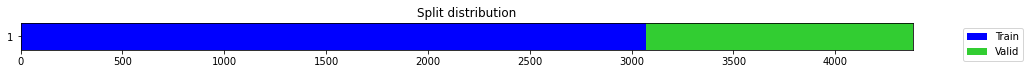

TypeError: __init__() got an unexpected keyword argument 'custom_head'

In [87]:
from tsai.data.preparation import *
tfms  = [None, [TSRegress()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
learn.fit_one_cycle(1)

In [88]:

tfms  = [None, [TSRegress()]]

NameError: name 'TSRegress' is not defined

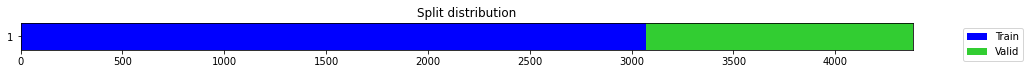

((#3069) [0,1,2,3,4,5,6,7,8,9...],
 (#1315) [3069,3070,3071,3072,3073,3074,3075,3076,3077,3078...])

In [84]:
TimeSplitter(valid_size=0.3)(y)

In [50]:
model.predict(X_valid[0:1])

array([[17.81220441, 17.35334706, 14.9759678 , 15.23246848, 11.7209895 ,
        13.05214835,  9.42790208,  6.31858009,  0.25362992, -2.31620061]])

In [74]:
indeces[indeces in indeces_train]

array([], shape=(0, 4384), dtype=int64)

In [78]:
indeces in indeces_train

False

In [79]:
tf_indeces = []
for i in indeces:
    tf_indeces.append(i in indeces_train)

In [ ]:
# Multivariate regression ensemble with sklearn-type API
from sklearn.metrics import mean_squared_error, make_scorer
dsid = 'AppliancesEnergy'
#X_train, y_train, X_valid, y_valid = get_Monash_regression_data(dsid)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = MiniRocketVotingRegressor(n_estimators=5, scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f'valid rmse        : {rmse:.5f} time: {t}')

valid rmse        : 17.40281 time: 0:04:32.796178


Git Gud

In [ ]:
X1, y = make_dataset_from_x(364)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, test_size=0.3)
# Univariate regression with sklearn-type API
from sklearn.metrics import mean_squared_error, make_scorer
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = MiniRocketRegressor(scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f'valid rmse        : {rmse:.5f} time: {t}')

valid rmse        : 17.42633 time: 0:00:55.231976


In [ ]:
X1, y = make_dataset_from_x(364)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, test_size=0.3)
# Univariate regression with sklearn-type API
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
rmse_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
model = MiniRocketRegressor(scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmae = mean_absolute_error(y_valid, y_pred)
print(f'valid rmae        : {rmae:.5f} time: {t}')
print(f'valid rmse        : {rmse:.5f} time: {t}')

valid rmae        : 10.57843 time: 0:00:57.012433
valid rmse        : 16.33624 time: 0:00:57.012433


In [ ]:
X1, y = make_dataset_from_x(364)
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X1, y, test_size=0.3)
# Univariate regression with sklearn-type API
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = MiniRocketRegressor(scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmae = mean_absolute_error(y_valid, y_pred)
print(f'valid rmae        : {rmae:.5f} time: {t}')
print(f'valid rmse        : {rmse:.5f} time: {t}')

valid rmae        : 10.50202 time: 0:00:55.080953
valid rmse        : 20.33315 time: 0:00:55.080953


In [ ]:
# Multivariate regression ensemble with sklearn-type API
from sklearn.metrics import mean_squared_error, make_scorer
dsid = 'AppliancesEnergy'
#X_train, y_train, X_valid, y_valid = get_Monash_regression_data(dsid)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = MiniRocketVotingRegressor(n_estimators=5, scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmae = mean_absolute_error(y_valid, y_pred)
print(f'valid rmae        : {rmae:.5f} time: {t}')
print(f'valid rmse        : {rmse:.5f} time: {t}')

valid rmae        : 9.70839 time: 0:04:08.225762
valid rmse        : 21.58727 time: 0:04:08.225762


In [ ]:
# Multivariate regression ensemble with sklearn-type API
from sklearn.metrics import mean_squared_error, make_scorer
dsid = 'AppliancesEnergy'
#X_train, y_train, X_valid, y_valid = get_Monash_regression_data(dsid)
rmse_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
model = MiniRocketVotingRegressor(n_estimators=5, scoring=rmse_scorer)
timer.start(False)
model.fit(X_train, y_train)
t = timer.stop()
y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmae = mean_absolute_error(y_valid, y_pred)
print(f'valid rmae        : {rmae:.5f} time: {t}')
print(f'valid rmse        : {rmse:.5f} time: {t}')

valid rmae        : 9.71250 time: 0:04:05.586424
valid rmse        : 21.82798 time: 0:04:05.586424


In [ ]:
!pip install pycaret


     |████████████████████████████████| 320 kB 7.8 MB/s 
     |████████████████████████████████| 2.0 MB 46.2 MB/s 
     |████████████████████████████████| 88 kB 5.8 MB/s 
     |████████████████████████████████| 262 kB 46.8 MB/s 
     |████████████████████████████████| 167 kB 54.0 MB/s 
     |████████████████████████████████| 56 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 48.0 MB/s 
     |████████████████████████████████| 17.8 MB 272 kB/s 
     |████████████████████████████████| 3.3 MB 34.8 MB/s 
     |████████████████████████████████| 120 kB 54.2 MB/s 
     |████████████████████████████████| 1.7 MB 44.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 43.7 MB/s 
     |████████████████████████████████| 15.3 MB 36.6 MB/s 
     |████████████████████████████████| 26.3 MB 59.1 MB/s 
     |████████████████